In [1]:
import pandas as pd
import re
import config
import sys
import matplotlib.pyplot as plt
import warnings; 

warnings.simplefilter('ignore')
%matplotlib inline
%run parser.py

In [2]:
df = pd.DataFrame(parsedData, columns=['date', 'time', 'user', 'message'])
df['message_length'] = df['message'].str.len()
df['datetime'] = pd.to_datetime(df['date'] + ' ' + df['time'])
df['date'] = pd.to_datetime(df['date'])
df = df.drop(columns=['time'])
df.dtypes

date              datetime64[ns]
user                      object
message                   object
message_length             int64
datetime          datetime64[ns]
dtype: object

In [3]:
df.describe()

,message_length
count,39998.000000
mean,24.939697
std,25.726112
min,1.000000
25%,11.000000
50%,19.000000
75%,32.000000
max,1199.000000


In [4]:
df.user.sort_values().unique()

array(['054', '101', '108', '183', '234', '260', '377', '523', '565',
       '633', '683', '778', '831', '835', '852', '861', '965', '988',
       None], dtype=object)

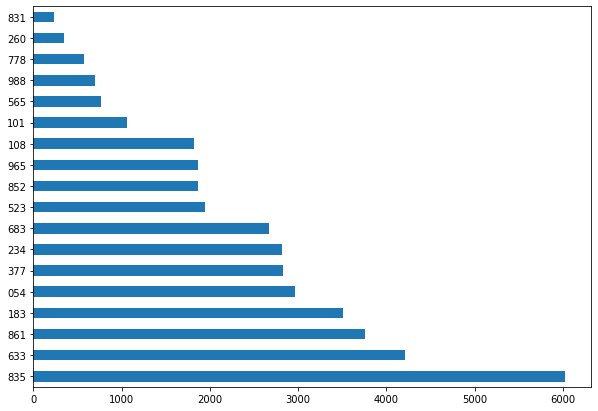

In [5]:
plt.figure(figsize=(10,7))
df['user'].value_counts().plot(kind="barh")

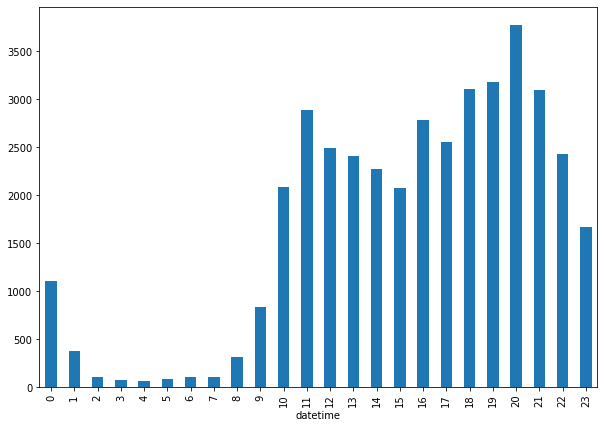

In [6]:
plt.figure(figsize=(10,7))
df.groupby(df["datetime"].dt.hour)['user'].count().plot(kind="bar")

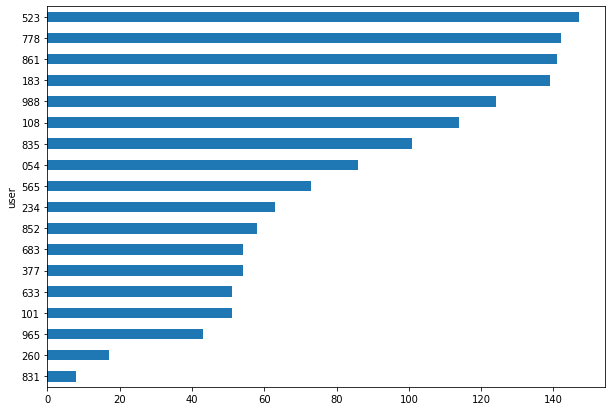

In [7]:
plt.figure(figsize=(10,7))
df[df['message'] == '<Media omessi>'].groupby(['user'])['message'].count().sort_values().plot(kind="barh")

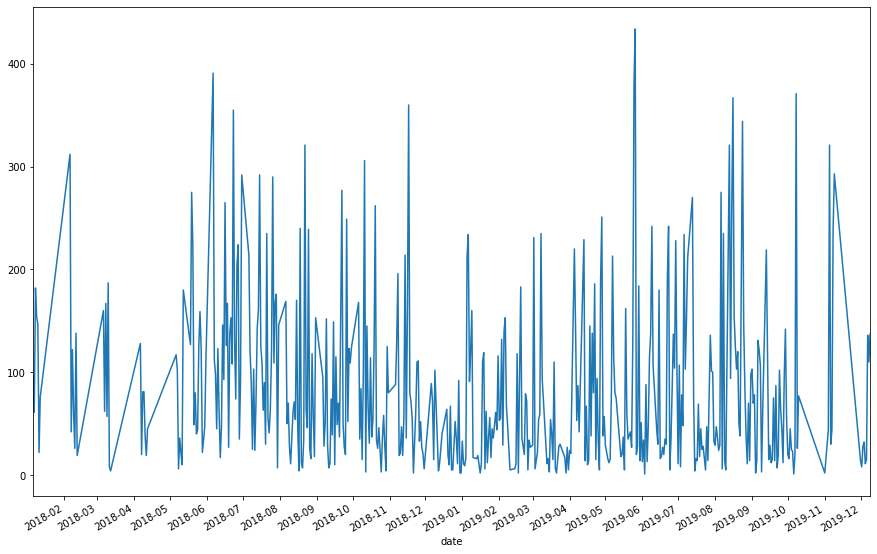

In [8]:
import matplotlib.dates as mdates
plt.figure(figsize=(15,10))
x = df.groupby(['date']).count()['message']
x.plot()
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
plt.gcf().autofmt_xdate() # Rotation
#x.index.unique()
#df.dtypes

In [22]:
#26/05/19 was the date of European elections... we're so clever... :P
df[df['date'] == '26/05/19'].shape

(434, 5)